# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
## Lecture 2: Solving the zero-dimensional energy balance model
### A self-study exercise in lieu of lecture

### About these notes:

This document uses the interactive [`IPython notebook`](http://ipython.org/notebook.html) format (now also called [`Jupyter`](https://jupyter.org)). The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2015 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

###From last class:
- we wrote down a budget for the energy content of the global climate system
- we wrote the OLR in terms of an effective emission temperature $T_e$
- The equilibrium emission temperature for Earth is about $T_e \approx 255$ K
- This depends only on energy output from the Sun, and the planetary albedo
- We assumed that global energy content is proportional to surface temperature $T_s$
- We thus have a single equation in two unknown temperatures:

$$C \frac{d T_s}{dt} = (1-\alpha) Q - \sigma T_e^4$$

### Parameterizing the dependence of OLR on surface temperature
Later, we will introduce additional physics for column radiative transfer to link $T_s$ and $T_e$.
For now, we'll make the **simplest assumption** we can:

$$ T_e = \beta T_s$$

where $\beta$ is a dimensionless constant. This is a **parameterization** that we introduce into the model for simplicity. We need a value for our **parameter** $\beta$, which we will get from observations:

$T_e = 255$ K

$T_s = 288$ K

Thus

$$ \beta = 255 / 288 = 0.885$$

Using this parameterization, we can now write a closed equation for surface temperature:

$$C \frac{d T_s}{dt}=(1-α)Q-σ(\beta T_s )^4$$

### Solving the energy balance model

This is a first-order Ordinary Differential Equation (ODE) for $T_s$ as a function of time. It is also our very first climate model.

To solve it (i.e. see how $T_s$ evolves from some specified initial condition) we have two choices:
1. Solve it analytically
2. Solve it numerically

Option 1 will usually not be possible because the equations will typically be too complex and non-linear. This is why computers are our best friends in the world of climate modeling.

HOWEVER it is often useful and instructive to simplify a model down to something that is analytically solvable when possible. Why? Two reasons:
1. Analysis will often yield a deeper understanding of the behavior of the system
2. Gives us a benchmark against which to test the results of our numerical solutions.

### Equilibrium solutions

Note that equilibrium surface temperature is 

$$\bar{T_s} = \frac{1}{β} \bigg( \frac{(1-α)Q}{σ}\bigg)^{\frac{1}{4}} = 288 K $$

We are going to linearize the equation for small perturbations away from this equilibrium.

Let $T_s = \bar{T_s} + T_s^\prime$ and restrict our solution to $T_s^\prime << \bar{T_s}$.
Note this this is not a big restriction! For example, a 10 degree warming or cooling is just $\pm$3.4% of the absolute equilibrium temperature.

### Linearizing the governing equation: the feedback parameter
Now use a first-order Taylor series expansion to write

$$OLR \approx \sigma \big(\beta T_s \big)^4 \approx \sigma \big(\beta \bar{T_s} \big)^4 + \Big(4 \sigma \beta^4 \bar{T_s}^3 \Big) T_s^\prime $$

and the budget for the perturbation temperature thus becomes

$$C \frac{d T_s^\prime}{d t} = \lambda T_s^\prime$$

where we define

$$\lambda = -\Big(4 \sigma \beta^4 \bar{T_s}^3 \Big)$$

Here $\lambda$ is actually the **feedback parameter** for our system. We will say much more about this later in the course.
Putting in our observational values, we get 

$\lambda = -3.3$ W m$^{-2}$ K$^{-1}$

This is actually our first estimate of what we will later call the **Planck feedback**, which is found in every climate model. It is the tendency for a warm surface to cool by increased longwave radiation to space. We include the negative sign to indicate that this is a **negative feedback**, which tends to restore the system towards equilibrium. Again, we will return to this later in the course.

### Solve the linear ODE

Now define

$$ \tau = C / (-\lambda)$$

This is a positive constant with dimensions of time (seconds). With these definitions the temperature evolves according to

$$ \frac{d T_s^\prime}{d t} = - \frac{T_s^\prime}{\tau}$$

This is one of the simplest ODEs. Hopefully it looks familiar to most of you. It is the equation for an **exponential decay** process. We can easily solve for the temperature evolution by integrating from an initial condition $T_s^\prime(0)$:

$$ \int_{T_s^\prime(0)}^{T_s^\prime(t)} \frac{d T_s^\prime}{T_s^\prime} = -\int_0^t  \frac{dt}{\tau}$$

$$\ln \bigg( \frac{T_s^\prime(t)}{T_s^\prime(0)} \bigg) = -\frac{t}{\tau}$$

$$T_s^\prime(t) = T_s^\prime(0) \exp \bigg(-\frac{t}{\tau} \bigg)$$

I hope that the mathematics is straightforward for everyone in this class. If not, go through it carefully and make sure you understand each step.

### e-folding time for relaxation of global mean temperature
Our model says that surface temperature will relax toward its equilibrium value over a characteristic time scale $\tau$. This is an **e-folding time** – the time it takes for the perturbation to decay by a factor 1/e = 0.37

*What should this timescale be for the climate system?*

To estimate $\tau$ we need a value for the effective heat capacity $C$.
A quick and dirty estimate:

$$C = c_w \rho_w H$$

where 

$c_w = 4 \times 10^3$ J kg$^{-1}$ $^\circ$C$^{-1}$ is the specific heat of water,

$\rho_w = 10^3$ kg m$^{-3}$ is the density of water, and

$H$ is an effective depth of water that is heated or cooled.

What is the right choice for $H$? That turns out to be an interesting and subtle question. It depends very much on the timescale of the problem
- days?
- years?
- decades?
- millenia?

We will revisit this question later in the course. For now, let’s just assume that $H = 100$ m (a bit deeper than the typical depth of the surface mixed layer in the oceans).

Then $C = 4 \times 10^8$ J m$^{-2}$ K$^{-1}$. 
And the e-folding time for the surface temperature will be

$$\tau = \frac{4 \times 10^8 J m^{-2} K^{-1}}{3.3 W m^{-2} K^{-1}}  = 1.4 \times 10^8 s \approx \text{4 years} $$

This is a rather fast timescale relative to other processes that can affect the planetary energy budget, as we will discuss later. 

Some take-away messages:
- Earth (or any planet) has a well-defined equilibrium temperature because of the temperature dependence of the outgoing longwave radiation.
- The system will tend to relax toward its equilibrium temperature on an e-folding timescale that depends on (1) radiative feedback processes, and (2) effective heat capacity.
- In our estimate, this e-folding time is relatively short. In the absence of other processes that can either increase the heat capacity or lower (in absolute value) the feedback parameter, the Earth would never be very far out of energy balance
- We will quantify this statement more as the term progresses.

### Plotting the solution in Python
Here I'm going to show some example code for making simple line plots with Python. I strongly encourage you to try this out on your own. **Avoid the temptation to copy and paste the code!** You won't learn anything that way. Type the code into your own Python session. Experiment with it!

First we'll define a bunch of constants.

In [1]:
sigma = 5.67E-8  # Stefan-boltzmann constant
Q = 341.3  # global mean incoming solar radiation
alpha = 0.299  # planetary albedo
Tsbar = 288.  # global mean temperature
Te = ((1-alpha)*Q / sigma)**(0.25)  # emission temperature
beta = Te / Tsbar
lambda0 = -4 * sigma * beta**4 * Tsbar**3
print lambda0
C = 4E8 
tau = C / (-lambda0)
print tau
seconds_per_year = 60*60*24*365
print tau / seconds_per_year

-3.32293472222
120375521.471
3.81708274577


This code uses the `numpy` package to do efficient array operations. Before we use the package, we import it into the current Python session.

In [2]:
import numpy as np
t = np.linspace(0, 5*tau)  # a time array
print t
type(t)  # this shows that t is numpy.ndarray type
t.shape  # a tuple showing the dimensions of the array
Tsprime0 = 6.  # initial temperature perturbation
#  Here we define the actual solution
Tsprime = Tsbar + Tsprime0 * np.exp(-t/tau)  
print Tsprime
Tsprime.shape
#  got the same size array
#  the numpy function np.exp() operated simultaneously
#  on all elements of the array

[  0.00000000e+00   1.22832165e+07   2.45664330e+07   3.68496494e+07
   4.91328659e+07   6.14160824e+07   7.36992989e+07   8.59825153e+07
   9.82657318e+07   1.10548948e+08   1.22832165e+08   1.35115381e+08
   1.47398598e+08   1.59681814e+08   1.71965031e+08   1.84248247e+08
   1.96531464e+08   2.08814680e+08   2.21097897e+08   2.33381113e+08
   2.45664330e+08   2.57947546e+08   2.70230762e+08   2.82513979e+08
   2.94797195e+08   3.07080412e+08   3.19363628e+08   3.31646845e+08
   3.43930061e+08   3.56213278e+08   3.68496494e+08   3.80779711e+08
   3.93062927e+08   4.05346144e+08   4.17629360e+08   4.29912577e+08
   4.42195793e+08   4.54479010e+08   4.66762226e+08   4.79045443e+08
   4.91328659e+08   5.03611876e+08   5.15895092e+08   5.28178308e+08
   5.40461525e+08   5.52744741e+08   5.65027958e+08   5.77311174e+08
   5.89594391e+08   6.01877607e+08]
[ 294.          293.41795616  292.89237483  292.41777873  291.98922192
  291.60223825  291.25279482  290.93724996  290.65231525  290.395

(50,)

To make a plot, we will use the `matplotlib` library. The plotting commands work a lot like `MATLAB`. But, like any other package, we need to import it before using it.

In [3]:
# pyplot is the name of the library of plotting routines within matplotlib
#  here we import them and give them a "nickname"
import matplotlib.pyplot as plt

In [4]:
#  this command allows the plots to appear inline in this notebook
%matplotlib inline

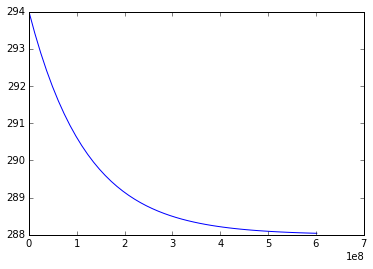

In [5]:
plt.plot(t, Tsprime)

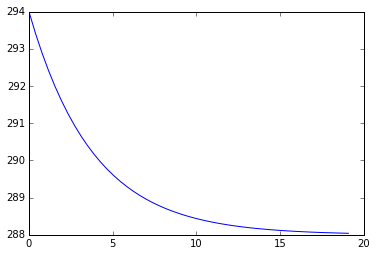

In [6]:
#  use a more convenient unit for time
plt.plot(t / seconds_per_year, Tsprime) 

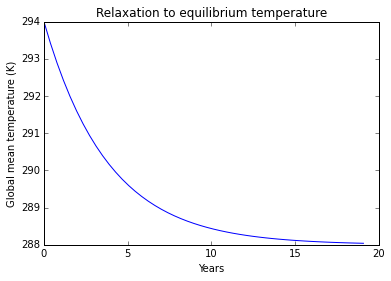

In [7]:
#  Or add some helpful labels
plt.plot(t / seconds_per_year, Tsprime) 
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title('Relaxation to equilibrium temperature')

### Solving the ODE numerically
In this case the equation is sufficiently simple that we have an analytical solution. Most models are too mathematically complex for this, and we need numerical solution methods. Because the governing equations for every model are differential in time (and usually in space as well), we need to use some numerical approximations to the governing equations.

We approximate the time derivative with

$$ \frac{dT}{dt} \approx \frac{∆T}{∆t} = \frac{T_1-T_0}{t_1-t_0} $$

which makes sense as long as the **timestep** $\delta t$ is *sufficiently small*.

What is meant by sufficiently small? In practice, small enough that the numerical solution behaves well! We will not spend much time in this course talking about numerical methods, but there is much we could say about this…

The simplest time discretization is called **Forward Euler** or **Explicit Euler**. Say we know the state of the system at time $t_0$, i.e. we know the temperature $T_0$. Then rearranging the above,

$$T_1 = T_0 + ∆t (dT/dt)$$

So if we can calculate the **tendency** of the system (i.e. the time derivative) at time $t_0$, then we have a formula to predict the next state of the system.

For our linearized zero-dimensional energy balance model, 

$$\frac{dT_s}{dt} = -\frac{1}{\tau} \big(T_s-\bar{T_s} \big)$$

So we can predict the temperature with

$$ T_1 = T_0 -  \frac{\Delta t}{\tau} \big( T_0 - \bar{T_s} \big)$$

Let’s implement this formula as a simple function in Python to calculate the next temperature at each timestep


In [8]:
def next_temperature(T0, timestep, tau):
    Tsbar = 288.
    return T0 - timestep/tau * (T0-Tsbar)

Now let’s construct the full numerical solution by looping in time:

In [9]:
Tnumerical = np.zeros_like(t)
print Tnumerical
print Tnumerical.size
# Assign the initial condition
Tnumerical[0] = Tsprime0 + Tsbar
print Tnumerical
# this shows indexing of the time array. t[0] is the first element
# t[1] is the second element
#  in Python we always start counting from zero
timestep = t[1] - t[0] 
for i in range(Tnumerical.size-1):
    # assign the next temperature value to the approprate array element
    Tnumerical[i+1] = next_temperature(Tnumerical[i], timestep, tau)
print Tnumerical

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
50
[ 294.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]
[ 294.          293.3877551   292.83798417  292.34431232  291.90101514
  291.50295237  291.14550825  290.82453802  290.53631986  290.27751171
  290.04511256  289.8364276   289.64903703  289.48076794  289.32966917
  289.19398865  289.07215307  288.9627497   288.86450993  288.77629463
  288.69708089  288.62595019  288.56207772  288.50472285  288.45322052
  288.40697353  288.36544562  288.32815525  288.29467002  288.26460165
  288.23760148  288.21335643  288.19158537  288.17203584  288

Now we are going to plot this alongside the analytical solution.

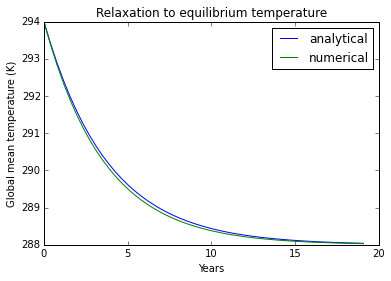

In [10]:
plt.plot(t / seconds_per_year, Tsprime, label='analytical') 
plt.plot(t / seconds_per_year, Tnumerical, label='numerical')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title('Relaxation to equilibrium temperature')
plt.legend()
# the legend() function uses the labels assigned in the above plot() commands

So this works quite well; the two solutions look nearly identical.

Now that we have built some confidence in the numerical method, we can use it to study a slightly more complex system for which we don’t have the analytical solution.

E.g. let’s solve the full non-linear energy balance model:

$$C \frac{dT_s}{dt} = (1-\alpha) Q - \sigma \big(\beta T_s \big)^4 $$

We’ll write a new solver function:

In [11]:
# absorbed solar is a constant in this model
ASR = (1-alpha)*Q  
# but the longwave depends on temperature... define a function for this
def OLR(Ts):
    return sigma * (beta*Ts)**4
# Now we put them together to get our simple solver function
def next_temperature_nonlinear(T0, timestep):
    return T0 + timestep/C * (ASR-OLR(T0))

We will now follow the same procedure as above to solve this model and plot the solution along with our two previous solutions of the linear model.

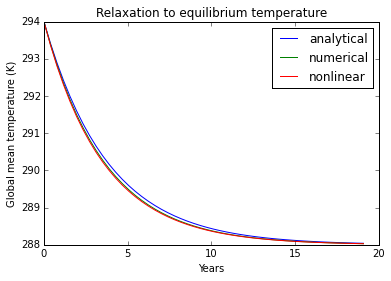

In [12]:
Tnonlinear = np.zeros_like(t)
Tnonlinear[0] = Tsprime0 + Tsbar
for i in range(Tnumerical.size-1):
    Tnonlinear[i+1] = next_temperature_nonlinear(Tnonlinear[i], timestep)

plt.plot(t / seconds_per_year, Tsprime, label='analytical') 
plt.plot(t / seconds_per_year, Tnumerical, label='numerical')
plt.plot(t / seconds_per_year, Tnonlinear, label='nonlinear')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title('Relaxation to equilibrium temperature')
plt.legend()

And we see that the models essentially do the same thing.

Now try some different initial conditions


In [13]:
T1 = 400.  # very hot
for n in range(50):
    T1 = next_temperature_nonlinear(T1, timestep)
print T1

288.294151595


In [14]:
T1 = 200.  # very cold
for n in range(50):
    T1 = next_temperature_nonlinear(T1, timestep)
print T1

287.28133982


The system relaxes back to 288 K regardless of its initial condition.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Version information
____________


In [15]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.1.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
climlab 0.2.11
Thu May 14 15:54:20 2015 EDT

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________